# Ejercitación espacios de color

Segmentación por color

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Using matplotlib backend: module://matplotlib_inline.backend_inline


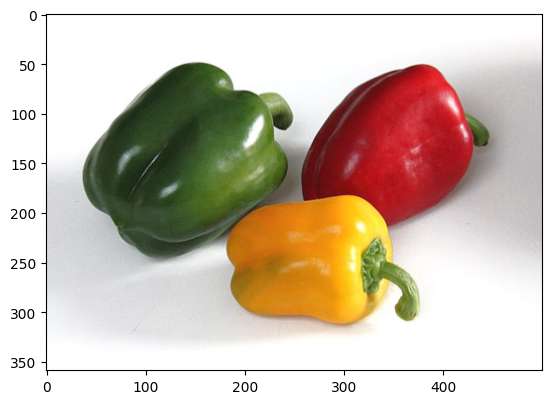

In [2]:
# Cargar la imagen color
img_color = cv.imread('pimiento_morron.jpg')
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(imgRGB)
plt.show()

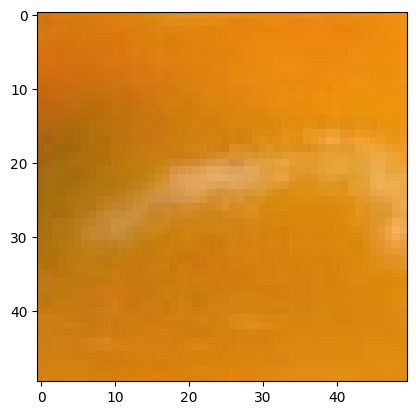

In [3]:
# Tomamos una muestra del morron amarillo
img_muestra = imgRGB[230:280, 230:280,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

In [4]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean, color_std = cv.meanStdDev(img_muestra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[213.66680000000002, 132.0984, 21.5452]
[16.6917398062632, 12.948695588359449, 15.321121269672139]


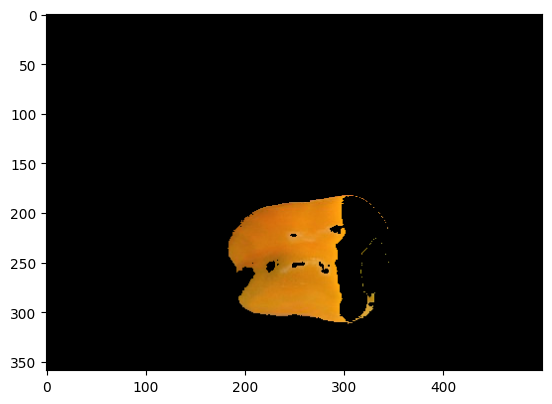

<function matplotlib.pyplot.show(close=None, block=None)>

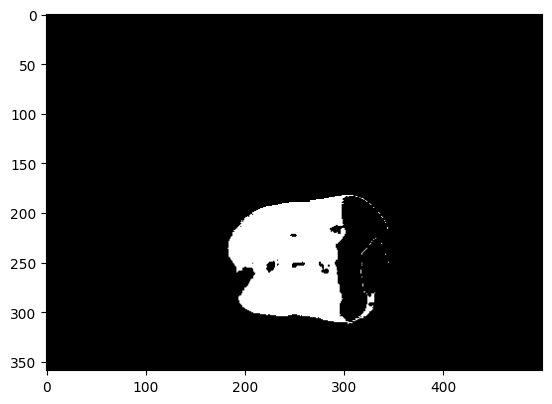

In [5]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

Veamos la distribucion de colores

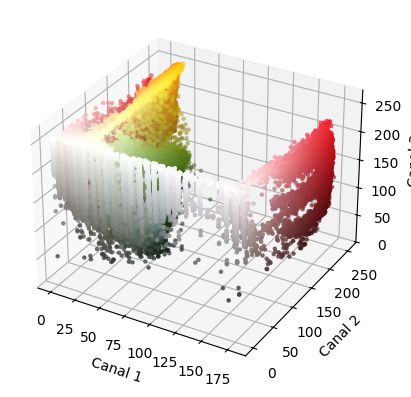

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
c1, c2, c3 = cv.split(img_HSV)

#c1, c2, c3 = cv.split(imgRGB)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

In [10]:
# Pasamos la imagen a HSV y calculo el color de muestra

img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

#img_muestra = img_HSV[100:150,325:375,:]
img_muestra_hsv = img_HSV[230:280,230:280,:]

# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean = cv.mean(img_muestra_hsv)
    
print(color_mean)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


<Figure size 640x480 with 0 Axes>

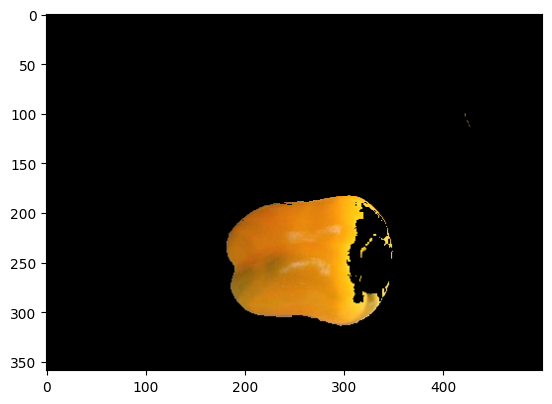

In [8]:
color_l = (14,100,100)
color_u = (24,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()